## 0. Install and Import Dependencies

In [ ]:
!pip install easyocr
!pip install imutils

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
from google.colab.patches import cv2_imshow


## 1. Read in Image, Grayscale and Blur

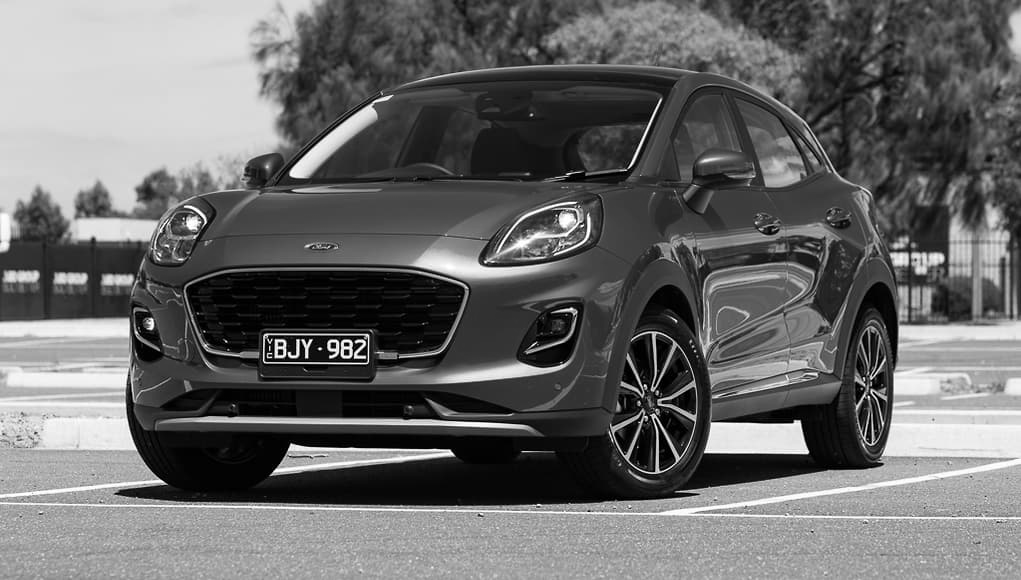

In [ ]:
img = cv2.imread('image3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

## 2. Apply filter and find edges for localization

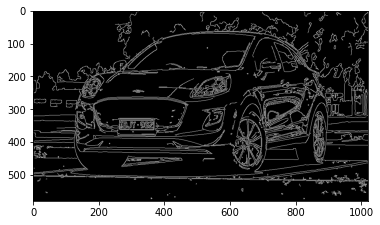

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection 找出邊緣(找出四方形的區域) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #找出contours
contours = imutils.grab_contours(keypoints) #找出很多個contours的點
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #只取後10個

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True) #找出大概是四方形的點
    if len(approx) == 4:
        location = approx #將找到的四個點存起來
        break

In [ ]:
location

array([[[263, 334]],

       [[264, 363]],

       [[369, 362]],

       [[366, 333]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8) 
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

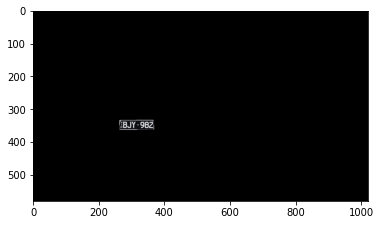

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
#將車牌切出來
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

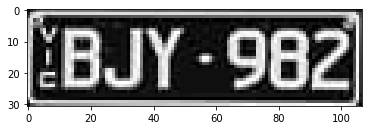

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 2], [107, 2], [107, 31], [0, 31]], 'EBJY. 982]', 0.35703887732789946)]

## 5. Render Result

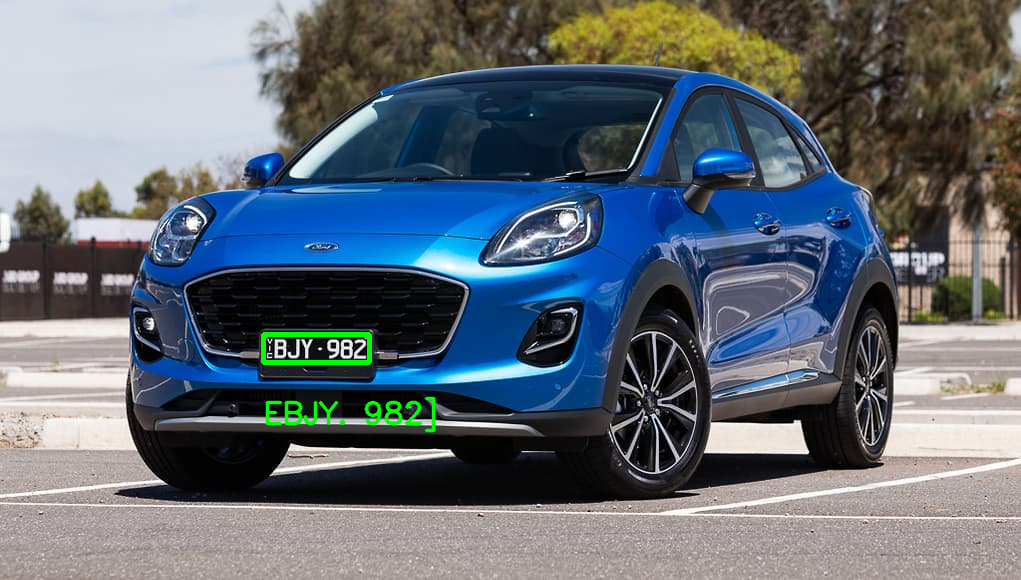

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
# plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
cv2_imshow(res)